In [25]:
def desagregar_temp(semana,dia,TipoDia,DIA):
    diario = dia.loc[TipoDia,:]
    diario = diario*semana.loc[DIA,:]
    diario.drop('Hora', inplace=True, axis=1)
    #diarioLJ = diarioLJ.set_index(dia.loc[TipoD,"Hora"])
    d = diario.sum(axis="columns")
    d = pd.concat([d, dia.loc[TipoDia,"Hora"]], axis=1)
    return d
def crea_csv(MES, LJ, V, S, D, cont):
    if MES == "ENERO": #29 EN - 2 FEB
        R = pd.concat([V,S,D,LJ,LJ])
        x = datetime(2021, 1, 29)
        y = datetime(2021, 2, 2)
        z = y - x
    elif MES == "MARZO": #17-28 MAR
        R = pd.concat([LJ,LJ,V,S,D,LJ,LJ,LJ,LJ*0.64,V*0.64,S*0.64,D*0.64])
        x = datetime(2021, 3, 17)
        y = datetime(2021, 3, 28)
        z = y - x
    elif MES == "DICIEMBRE": #11-30 DIC 
        R = pd.concat([S,D,LJ,LJ,LJ,LJ,V,S,D,LJ,LJ,LJ,LJ,
                   V,S,D,LJ,LJ,LJ,LJ])
        x = datetime(2021, 12, 11)
        y = datetime(2021, 12, 30)
        z = y - x
    a = {}
    for i in range((z.days + 1)*24):
        a[i] = x + timedelta(hours=+i)
        #print(timedelta(hours=+i))
    a = pd.DataFrame(a.items(), columns=['id', 'Date'])
    a.reset_index(inplace=True, drop=True)
    R.reset_index(inplace=True, drop=True)
    df = pd.concat([R,a["Date"]], axis=1)
    df.rename(columns={0: "em [gr/hr]"}, inplace=True)
    df.drop('Hora', inplace=True, axis=1)
    name = MES+"_"+cont +".csv"
    df.to_csv(name, index=False)
    return df


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
cont = "Methylbenzene (toluene)"
df = pd.read_excel('Emisiones 2020 VOC.xlsx',cont,index_col=None)
df2 = pd.read_excel("Emisiones 2020 VOC.xlsx",index_col=None,sheet_name=None)
mes = pd.read_excel("Perfil_Mensual.xlsx")
sem = pd.read_csv("Perfil_Semanal.csv")
dia = pd.read_csv("Perfil_diario.csv")

In [27]:
mes = pd.read_excel("Perfil_Mensual.xlsx")
sem = pd.read_csv("Perfil_Semanal.csv")
dia = pd.read_csv("Perfil_diario.csv")

In [28]:
round(df[((df["Categoría"]=="BUS RIG")| (df["Categoría"]=="BUS ART")) & (df["Ámbito"]=="Urbano") & 
   (df["Región"]=="R13")][2020].sum()/365)

42

In [29]:
round(df[((df["Categoría"]=="BUS RIG")| (df["Categoría"]=="BUS ART")) & (df["Ámbito"]=="Interurbano")& 
   (df["Región"]=="R13")][2020].sum()/365)

0

In [30]:
round(df[((df["Categoría"]!="BUS RIG")| (df["Categoría"]!="BUS ART")) & (df["Ámbito"]=="Urbano") & 
   (df["Región"]=="R13")][2020].sum()/365)

115935

In [31]:
round(df[((df["Categoría"]!="BUS RIG")| (df["Categoría"]!="BUS ART")) & (df["Ámbito"]=="Interurbano")& 
   (df["Región"]=="R13")][2020].sum()/365)

13272

In [32]:
for key,data in df2.items():
#    print(key)
    df = df2[key]
    cont = key
    BUS = df[((df["Categoría"]=="BUS RIG")| (df["Categoría"]=="BUS ART")) & 
       (df["Región"]=="R13")][2021].sum()
    CAM = df[((df["Categoría"]=="CAM LIV")| (df["Categoría"]=="CAM MED")) & 
       (df["Región"]=="R13")][2021].sum()
    CAMP = df[((df["Categoría"]=="CAM PES")) & 
       (df["Región"]=="R13")][2021].sum()
    VLC = df[((df["Categoría"]=="VLC")) & 
       (df["Región"]=="R13")][2021].sum()
    VLP = df[((df["Categoría"]=="VLP")) & 
       (df["Región"]=="R13")][2021].sum()
    porcentaje_poly=0.00108795574
    mes_bus = mes["BUS"]*BUS*porcentaje_poly
    mes_cam = mes["CAM"]*CAM*porcentaje_poly
    mes_camp = mes["CAMP"]*CAMP*porcentaje_poly
    mes_vlc = mes["VLC"]*VLC*porcentaje_poly
    mes_vlp = mes["VLP"]*VLP*porcentaje_poly
    mes_total = pd.concat([mes["MES"], mes_bus, mes_cam, mes_camp, mes_vlc, mes_vlp],axis=1)
    mes_total = mes_total.set_index("MES")
    dias=dia.set_index("TipoD")
    MESES = ["ENERO", "MARZO", "DICIEMBRE"]
    for MES in MESES: 
#    MES = MESES[1]
        semana = mes_total.loc[MES,:]*sem/4
        semana.drop('SEMANA', inplace=True, axis=1)
        semana = semana.set_index(sem["SEMANA"])
        LJ = desagregar_temp(semana,dias,"LJ","LUNES")
        V = desagregar_temp(semana,dias,"V","VIERNES")
        S = desagregar_temp(semana,dias,"S","SÁBADO")
        D = desagregar_temp(semana,dias,"D","DOMINGO")
        dff = crea_csv(MES, LJ, V, S, D, cont)

In [33]:
mes_bus = mes["BUS"]*BUS*porcentaje_poly
mes_cam = mes["CAM"]*CAM*porcentaje_poly
mes_camp = mes["CAMP"]*CAMP*porcentaje_poly
mes_vlc = mes["VLC"]*VLC*porcentaje_poly
mes_vlp = mes["VLP"]*VLP*porcentaje_poly
mes_total = pd.concat([mes["MES"], mes_bus, mes_cam, mes_camp, mes_vlc, mes_vlp],axis=1)
mes_total = mes_total.set_index("MES")
dias=dia.set_index("TipoD")

In [34]:
MESES = ["ENERO", "MARZO", "DICIEMBRE"]
for MES in MESES: 
#    MES = MESES[1]
    semana = mes_total.loc[MES,:]*sem/4
    semana.drop('SEMANA', inplace=True, axis=1)
    semana = semana.set_index(sem["SEMANA"])
    LJ = desagregar_temp(semana,dias,"LJ","LUNES")
    V = desagregar_temp(semana,dias,"V","VIERNES")
    S = desagregar_temp(semana,dias,"S","SÁBADO")
    D = desagregar_temp(semana,dias,"D","DOMINGO")
    dff = crea_csv(MES, LJ, V, S, D, cont)


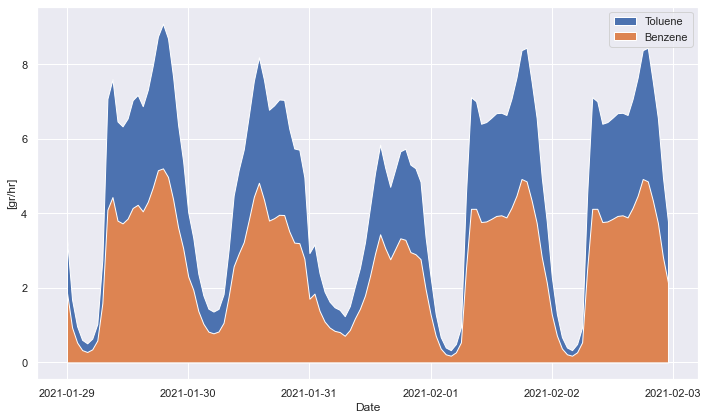

In [71]:
plt.figure(figsize=(10,6), tight_layout=True)
#plt.title()
plt.xlabel('Date')
plt.ylabel('[gr/hr]')
sns.set_theme()


Benzene = pd.read_csv("ENERO_Benzene (benzol).csv")
Benzene["Date"] = pd.to_datetime(Benzene["Date"], format='%Y-%m-%d %H:%M:%S')
Toluene = pd.read_csv("ENERO_Methylbenzene (toluene).csv")
Toluene["Date"] = pd.to_datetime(Toluene["Date"], format='%Y-%m-%d %H:%M:%S')
Benzene["cont"] = "Benzene"
Toluene["cont"] = "Toluene"

#plt.plot(Benzene["Date"],Toluene["em [gr/hr]"],label="Toluene")
plt.fill_between(Benzene["Date"],Toluene["em [gr/hr]"],label="Toluene",alpha=1)
#plt.plot(Benzene["Date"],Benzene["em [gr/hr]"],label="Benzene",alpha=0.5)
plt.fill_between(Benzene["Date"],Benzene["em [gr/hr]"],label="Benzene",alpha=1)#)Toluene["em [gr/hr]"], labels=["Benzene","Toluene"])

#plt.stackplot(Toluene["Date"],Toluene["em [gr/yr]"],'-',label='Toluene')

plt.legend()
plt.savefig('DICIENBRE_TOLUENO_BENCENO.png')
#plt.show()

In [55]:
Toluene.sum()

<ipython-input-55-f0eaff0fd88b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Toluene.sum()


em [gr/hr]                                          2197.308382
cont          TolueneTolueneTolueneTolueneTolueneTolueneTolu...
dtype: object

In [37]:
Benzene.sum()

<ipython-input-37-52032984ad0a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Benzene.sum()


em [gr/hr]                                          1270.307947
cont          BenzeneBenzeneBenzeneBenzeneBenzeneBenzeneBenz...
dtype: object